In [1]:
import numpy as np
import time
import sys
import matplotlib.pyplot as plt
import mdptoolbox, mdptoolbox.example

In [2]:
P, R = mdptoolbox.example.forest(S = 3000, p = 0.45)
P

array([[[0.45, 0.55, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.45, 0.  , 0.55, ..., 0.  , 0.  , 0.  ],
        [0.45, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [0.45, 0.  , 0.  , ..., 0.  , 0.55, 0.  ],
        [0.45, 0.  , 0.  , ..., 0.  , 0.  , 0.55],
        [0.45, 0.  , 0.  , ..., 0.  , 0.  , 0.55]],

       [[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]]])

In [3]:
R

array([[0., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [4., 2.]])

In [4]:
# Policy Iterations
max_iterations = 100000
gamma = 0.9

pol_policy = [0]*int(gamma*10)
pol_iter = [0]*int(gamma*10)
pol_time = [0]*int(gamma*10)
pol_gamma = [0]*int(gamma*10)
pol_value = [0]*int(gamma*10)
pol_avgval = [0]*int(gamma*10)

val_policy = [0]*int(gamma*10)
val_iter = [0]*int(gamma*10)
val_time = [0]*int(gamma*10)
val_gamma = [0]*int(gamma*10)
val_value = [0]*int(gamma*10)
val_avgval = [0]*int(gamma*10)

Q_policy = []
Q_table = []
Q_reward = []
Q_time = []
Q_gamma = []
Q_value = []
Q_avgvalue = []

for g in range(1,int((gamma+.1)*10),1):
    pi_p = mdptoolbox.mdp.PolicyIteration(P,R,g/10)
    pi_p.run()
    pi_v = mdptoolbox.mdp.ValueIteration(P,R,g/10)
    pi_v.run() 
    pi_q = mdptoolbox.mdp.QLearning(P,R,g/10)
    pi_q.run()
    
    pol_policy[g-1] = pi_p.policy
    pol_iter[g-1] = pi_p.iter
    pol_time[g-1] = pi_p.time
    pol_gamma[g-1] = g/10
    pol_value[g-1] = np.amax(pi_p.V)
    pol_avgval[g-1] = np.mean(pi_p.V)

    
    print("Policy", " iter: ", pol_iter[g-1], "gamma: ", pol_gamma[g-1],  
          "time: ", pol_time[g-1], "value: ", pol_value[g-1])
    
    val_policy[g-1] = pi_v.policy
    val_iter[g-1] = pi_v.iter
    val_time[g-1] = pi_v.time
    val_gamma[g-1] = g/10
    val_value[g-1] = np.amax(pi_v.V)
    val_avgval[g-1] = np.mean(pi_v.V)
    
    
    print("value", " iter: ", val_iter[g-1], "gamma: ", val_gamma[g-1],  
          "time: ", val_time[g-1], "value: ", val_value[g-1])
    
    #Q_policy.append(pi_q.policy)
    Q_table.append(pi_q.Q)
    Q_time.append(pi_q.time)
    Q_gamma.append(g/10)
    Q_value.append(np.amax(pi_q.V))
    Q_avgvalue.append(np.mean(pi_q.V))

Policy  iter:  1 gamma:  0.1 time:  0.3862037658691406 value:  4.235562576794805
value  iter:  2 gamma:  0.1 time:  0.008669853210449219 value:  4.22
Policy  iter:  1 gamma:  0.2 time:  0.39259910583496094 value:  4.506908593987246
value  iter:  3 gamma:  0.2 time:  0.012792587280273438 value:  4.4983
Policy  iter:  1 gamma:  0.3 time:  0.38627099990844727 value:  4.823131174805509
value  iter:  3 gamma:  0.3 time:  0.013303041458129883 value:  4.791175
Policy  iter:  2 gamma:  0.4 time:  0.7850039005279541 value:  5.19756200084069
value  iter:  4 gamma:  0.4 time:  0.017136335372924805 value:  5.171632000000001
Policy  iter:  2 gamma:  0.5 time:  0.7844245433807373 value:  5.651115618661257
value  iter:  5 gamma:  0.5 time:  0.024379968643188477 value:  5.621524609375
Policy  iter:  2 gamma:  0.6 time:  0.7663924694061279 value:  6.220121198518686
value  iter:  6 gamma:  0.6 time:  0.024630069732666016 value:  6.171845381200001
Policy  iter:  2 gamma:  0.7 time:  0.7735922336578369 va

In [5]:
pol_gamma

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

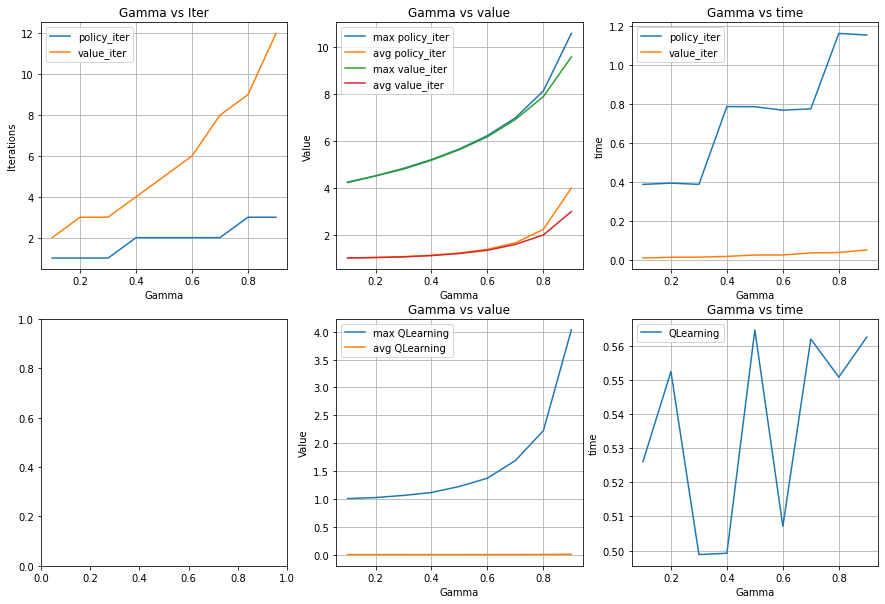

In [6]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))

ax[0,0].plot(pol_gamma, pol_iter, label = 'policy_iter')
ax[0,0].plot(val_gamma, val_iter, label = 'value_iter')
ax[0,0].set_title('Gamma vs Iter')
ax[0,0].set_xlabel('Gamma')
ax[0,0].set_ylabel('Iterations')
ax[0,0].grid()
ax[0,0].legend()

ax[0,1].plot(pol_gamma, pol_value, label = 'max policy_iter')
ax[0,1].plot(pol_gamma, pol_avgval, label = 'avg policy_iter')
ax[0,1].plot(val_gamma, val_value, label = 'max value_iter')
ax[0,1].plot(val_gamma, val_avgval, label = 'avg value_iter')
ax[0,1].set_title('Gamma vs value')
ax[0,1].set_xlabel('Gamma')
ax[0,1].set_ylabel('Value')
ax[0,1].grid()
ax[0,1].legend()

ax[0,2].plot(pol_gamma, pol_time, label = 'policy_iter')
ax[0,2].plot(val_gamma, val_time, label = 'value_iter')
ax[0,2].set_title('Gamma vs time')
ax[0,2].set_xlabel('Gamma')
ax[0,2].set_ylabel('time')
ax[0,2].grid()
ax[0,2].legend()

#====================================

ax[1,1].plot(Q_gamma, Q_value, label = 'max QLearning')
ax[1,1].plot(Q_gamma, Q_avgvalue, label = 'avg QLearning')
ax[1,1].set_title('Gamma vs value')
ax[1,1].set_xlabel('Gamma')
ax[1,1].set_ylabel('Value')
ax[1,1].grid()
ax[1,1].legend()

ax[1,2].plot(Q_gamma, Q_time, label = 'QLearning')
ax[1,2].set_title('Gamma vs time')
ax[1,2].set_xlabel('Gamma')
ax[1,2].set_ylabel('time')
ax[1,2].grid()
ax[1,2].legend()